# Developing LeNet from scratch

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F


torch.use_deterministic_algorithms(True)

In [ ]:
class LeNet(nn.Module):
  def __init__(self):
    super(LeNet, self).__init__()
    self.cn1 = nn.Conv2d(3, 6, 5)
    self.cn2 = nn.Conv2d(6, 16, 5)
    self.fc1 = nn.Linear(16*5*5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
    x = F.relu(self.cn1(x))
    x = F.max_pool2d(x, (2,2))
    x = F.relu(self.cn2(x))
    x = F.max_pool2d(x, (2,2))
    x = x.view(-1, self.flattened_features(x))
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

  def flattened_features(self, x):
    # all except the first (batch) dimension
    num_of_features = 1
    size = x.size()[1:]
    for s in size:
      num_of_features *= s
    return num_of_features

In [ ]:
lenet = LeNet()
print(lenet)

LeNet(
  (cn1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (cn2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [ ]:
def train(net, trainloader, optim, epoch):
  loss_total = 0.0
  for i, data in enumerate(trainloader, 0):
    ip, ground_truth = data
    optim.zero_grad()
    op = net(ip)
    loss = nn.CrossEntropyLoss()(op, ground_truth)
    loss.backward()
    optim.step()

    loss_total += loss

    if epoch % 1000 == 0 :
      print('[Epoch number: %d, Mini-batches: %5d] loss: %.3f' % (epoch+1, i+1, loss_total/200))
      loss_total = 0.0

In [ ]:
def test(net, testloader):
  counter = 0
  success = 0
  with torch.no_grad():
    for data in testloader:
      ip, ground_truth = data
      op = net(ip)
      _, pred = torch.max(op.data, 1)
      counter += ground_truth.size(0)
      success += (ground_truth == pred).sum().item()

  print('LeNet accuracy on 10000 images from test dataset: %d %%' % ((success/counter)*100))

In [ ]:
train_transform = transforms.Compose(
    [
        transforms.RandomHorizontalFlip(),
        transforms.RandomCrop(32, 4),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
     ]
)

test_transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ]
)

In [ ]:
train_data = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=train_transform)
test_data = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=test_transform)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_data, batch_size=8, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=10000, shuffle=False)

In [ ]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog','frog', 'horse', 'ship', 'truck')

In [ ]:
def imageshow(image):
  image = image / 2 + 0.5
  npimage = image.numpy()
  plt.imshow(np.transpose(npimage, (1,2,0)))
  plt.show()

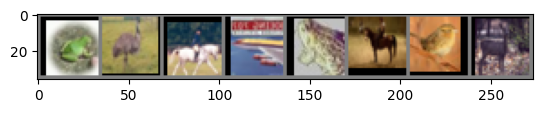

In [ ]:
dataiter = iter(train_dataloader)
images, labels = next(dataiter)

num_images = 4
imageshow(torchvision.utils.make_grid(images))

In [ ]:
print(' '+' || '.join((classes[labels[j]] for j in range(8))))

 frog || bird || horse || plane || frog || horse || bird || deer


In [ ]:
# trainig LeNet

optim = torch.optim.Adam(lenet.parameters(), lr=0.001)

for epoch in range(50):
  train(lenet, train_dataloader, optim, epoch)
  print()
  test(lenet, test_dataloader)
  print()

print("Training Finished")

Streaming output truncated to the last 5000 lines.
[Epoch number: 1, Mini-batches:  1281] loss: 0.009
[Epoch number: 1, Mini-batches:  1282] loss: 0.008
[Epoch number: 1, Mini-batches:  1283] loss: 0.008
[Epoch number: 1, Mini-batches:  1284] loss: 0.010
[Epoch number: 1, Mini-batches:  1285] loss: 0.009
[Epoch number: 1, Mini-batches:  1286] loss: 0.007
[Epoch number: 1, Mini-batches:  1287] loss: 0.008
[Epoch number: 1, Mini-batches:  1288] loss: 0.008
[Epoch number: 1, Mini-batches:  1289] loss: 0.009
[Epoch number: 1, Mini-batches:  1290] loss: 0.007
[Epoch number: 1, Mini-batches:  1291] loss: 0.009
[Epoch number: 1, Mini-batches:  1292] loss: 0.010
[Epoch number: 1, Mini-batches:  1293] loss: 0.010
[Epoch number: 1, Mini-batches:  1294] loss: 0.010
[Epoch number: 1, Mini-batches:  1295] loss: 0.009
[Epoch number: 1, Mini-batches:  1296] loss: 0.008
[Epoch number: 1, Mini-batches:  1297] loss: 0.009
[Epoch number: 1, Mini-batches:  1298] loss: 0.008
[Epoch number: 1, Mini-batches:

KeyboardInterrupt: 

In [ ]:
class_success = list(0. for i in range(10))
class_counter = list(0. for i in range(10))

with torch.no_grad():
  for data in test_dataloader:
    im, groundtruth = data
    op = lenet(im)
    _, pred = torch.max(op.data, 1)
    c = (pred == groundtruth).squeeze()
    for i in range(10000):
      groundtruth_curr = groundtruth[i]
      class_success[groundtruth_curr] += c[i].item()
      class_counter[groundtruth_curr] += 1

for i in range(10):
  print("model accuracy for model: %5s : %2d %%" % (classes[i], 100 * class_success[i] / class_counter[i]))

# fine-tuning ALEXNET

In [ ]:
import torch
import torch.nn as nn

class AlexNet(nn.Module):
  def __init__(self, num_of_classes):
    super(AlexNet, self).__init__()

    self.feats = nn.Sequential(

        nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),

        nn.Conv2d(64, 192, kernel_size=5, padding=2),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),

        nn.Conv2d(192, 384, kernel_size=3, padding=1),
        nn.ReLU(),

        nn.Conv2d(384, 256, kernel_size=3, padding=1),
        nn.ReLU(),

        nn.Conv2d(256, 256, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.MaxPoll2d(kernel_size=2, stride=2)

    )

    self.clf = nn.Linear(in_features=256, out_features=num_of_classes)

  def forward(self, inp):
    op = self.feats(inp)
    op = op.view(op.size(0), -1)
    op = self.clf(op)
    return op

In [ ]:
import os
import time
import copy
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torchvision import datasets, models, transforms
torch.use_deterministic_algorithms(True)

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp 'kaggle.json' ~/.kaggle/

In [ ]:
#!/bin/bash
!kaggle datasets download ajayrana/hymenoptera-data

Dataset URL: https://www.kaggle.com/datasets/ajayrana/hymenoptera-data
License(s): CC0-1.0
 96% 87.0M/90.2M [00:03<00:00, 28.2MB/s]
100% 90.2M/90.2M [00:03<00:00, 24.0MB/s]


In [ ]:
!unzip hymenoptera-data.zip

In [ ]:
ddir = 'hymenoptera_data'

data_transformers = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.490, 0.449, 0.411], [0.231, 0.221, 0.230])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.490, 0.449, 0.411], [0.231, 0.221, 0.230])
    ])
}

In [ ]:
img_data = {k: datasets.ImageFolder(os.path.join(ddir, k), data_transformers[k]) for k in ['train', 'val']}

dloaders = {k: torch.utils.data.DataLoader(img_data[k], batch_size=8, shuffle=True) for k in ['train', 'val']}

In [ ]:
dset_sizes = {k: len(img_data[k]) for k in ['train', 'val']}
class_names = img_data['train'].classes
dvc = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
def imageshow(img, text=None):
  img = img.numpy().transpose((1,2,0))
  mean = np.array([0.490, 0.449, 0.411])
  stddev = np.array([0.231, 0.221, 0.230])
  img = stddev * img + mean
  img = np.clip(img, 0, 1)
  plt.imshow(img)
  if text is not None:
    plt.title(text)
  plt.show()

In [ ]:
classes = img_data['train'].classes

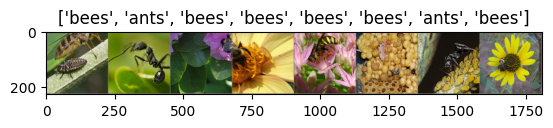

In [ ]:
imgs, cls = next(iter(dloaders['train']))

grid = torchvision.utils.make_grid(imgs)
imageshow(grid, text=[classes[c] for c in cls])

In [ ]:
def finetune_model(pretrained_model, loss_func, optim, epochs=10):
  start = time.time()
  accuracy = 0.0

  model_weights = copy.deepcopy(pretrained_model.state_dict())
  for e in range(epochs):
    print(f"Epoch number {e} / {epochs-1}")
    print("="*20)
    for dset in ['train', 'val']:
      if dset == 'train':
        pretrained_model.train()
      else:
        pretrained_model.eval()

      loss = 0.0
      successes = 0

      for imgs, tgts in dloaders[dset]:
        imgs = imgs.to(dvc)
        tgts = tgts.to(dvc)
        optim.zero_grad()

        with torch.set_grad_enabled(dset=='train'):
          ops = pretrained_model(imgs)
          # _, preds = torch.max(ops, 1)
          loss_curr = loss_func(ops, tgts)
          if dset == 'train':
            loss_curr.backward()
            optim.step()

        loss += loss_curr.item() * imgs.size(0)
        _, preds = torch.max(ops, 1)
        successes += torch.sum(preds == tgts.data)

      loss_epoch = loss / dset_sizes[dset]
      accuracy_epoch = successes.double() / dset_sizes[dset]
      print(f'{dset} Loss: {loss_epoch:.4f} Acc: {accuracy_epoch:.4f}')

      if dset == 'val' and accuracy < accuracy_epoch:
        accuracy = accuracy_epoch
        model_weights = copy.deepcopy(pretrained_model.state_dict())
    print()

  time_delta = time.time() - start
  print(f"training time: {time_delta//60} for {time_delta%60} seconds")
  print(f"best accuracy: {accuracy}")

  pretrained_model.load_state_dict(model_weights)
  return pretrained_model

In [ ]:
def visualize_predictions(pretrained_model, max_num_imgs=4):
    torch.manual_seed(1)
    was_model_training = pretrained_model.training
    pretrained_model.eval()
    imgs_counter = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (imgs, tgts) in enumerate(dloaders['val']):
            imgs = imgs.to(dvc)
            tgts = tgts.to(dvc)
            ops = pretrained_model(imgs)
            _, preds = torch.max(ops, 1)

            for j in range(imgs.size()[0]):
                imgs_counter += 1
                ax = plt.subplot(max_num_imgs//2, 2, imgs_counter)
                ax.axis('off')
                ax.set_title(f'pred: {classes[preds[j]]} || target: {classes[tgts[j]]}')
                imageshow(imgs.cpu().data[j])

                if imgs_counter == max_num_imgs:
                    pretrained_model.train(mode=was_model_training)
                    return
        pretrained_model.train(mode=was_model_training)

In [ ]:
model_finetune = models.alexnet(pretrained=True)

In [ ]:
model_finetune.features

Sequential(
  (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (4): ReLU(inplace=True)
  (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU(inplace=True)
  (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (9): ReLU(inplace=True)
  (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
)

In [ ]:
model_finetune.classifier

Sequential(
  (0): Dropout(p=0.5, inplace=False)
  (1): Linear(in_features=9216, out_features=4096, bias=True)
  (2): ReLU(inplace=True)
  (3): Dropout(p=0.5, inplace=False)
  (4): Linear(in_features=4096, out_features=4096, bias=True)
  (5): ReLU(inplace=True)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)

In [ ]:
model_finetune.classifier[6] = nn.Linear(4096, len(classes))

In [ ]:
loss_func = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_finetune.parameters(), lr=0.0001)

In [ ]:
model_finetune = finetune_model(model_finetune, loss_func, optimizer, epochs=10)

Epoch number 0 / 9
train Loss: 0.6786 Acc: 0.6066
val Loss: 0.5047 Acc: 0.7778

Epoch number 1 / 9
train Loss: 0.5782 Acc: 0.6721
val Loss: 0.4300 Acc: 0.8497

Epoch number 2 / 9
train Loss: 0.4973 Acc: 0.7623
val Loss: 0.3782 Acc: 0.8954

Epoch number 3 / 9
train Loss: 0.4367 Acc: 0.7992
val Loss: 0.3474 Acc: 0.8889

Epoch number 4 / 9
train Loss: 0.4079 Acc: 0.8156
val Loss: 0.3255 Acc: 0.9020

Epoch number 5 / 9
train Loss: 0.3744 Acc: 0.8115
val Loss: 0.3102 Acc: 0.9150

Epoch number 6 / 9
train Loss: 0.3839 Acc: 0.8279
val Loss: 0.2977 Acc: 0.9150

Epoch number 7 / 9
train Loss: 0.3469 Acc: 0.8730
val Loss: 0.2884 Acc: 0.9150

Epoch number 8 / 9
train Loss: 0.3247 Acc: 0.8689
val Loss: 0.2800 Acc: 0.9281

Epoch number 9 / 9
train Loss: 0.3079 Acc: 0.8811
val Loss: 0.2740 Acc: 0.9281

training time: 6.0 for 27.874189376831055 seconds
best accuracy: 0.9281045751633987


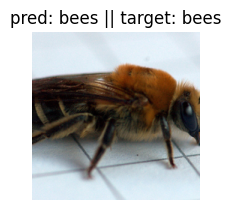

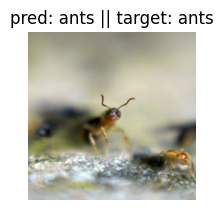

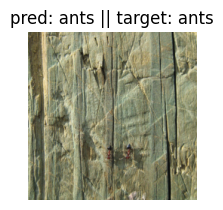

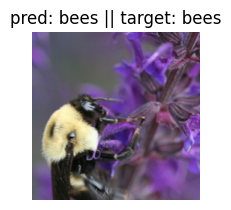

In [ ]:
visualize_predictions(model_finetune)

---

# Running a pretrained VGG model

In [ ]:
!wget https://raw.githubusercontent.com/arj7192/MasteringPyTorchV2/refs/heads/main/Chapter02/imagenet1000_clsidx_to_labels.txt

--2025-02-26 17:47:52--  https://raw.githubusercontent.com/arj7192/MasteringPyTorchV2/refs/heads/main/Chapter02/imagenet1000_clsidx_to_labels.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30564 (30K) [text/plain]
Saving to: ‘imagenet1000_clsidx_to_labels.txt’

imagenet1000_clsidx 100%[===================>]  29.85K  --.-KB/s    in 0.004s  

2025-02-26 17:47:52 (7.18 MB/s) - ‘imagenet1000_clsidx_to_labels.txt’ saved [30564/30564]



In [ ]:
with open('./imagenet1000_clsidx_to_labels.txt') as f:
  class_data = f.read()

In [ ]:
import os
import time
import copy
import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torchvision import datasets, models, transforms


torch.use_deterministic_algorithms(True)


ddir = 'hymenoptera_data'

# Data normalization and augmentation transformations for train dataset
# Only normalization transformation for validation dataset

data_transformers = {
    'train': transforms.Compose([transforms.RandomResizedCrop(224), transforms.RandomHorizontalFlip(),
                                    transforms.ToTensor(),
                                    transforms.Normalize([0.490, 0.449, 0.411], [0.231, 0.221, 0.230])]),
    'val': transforms.Compose([transforms.Resize(256), transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.490, 0.449, 0.411], [0.231, 0.221, 0.230])])}

img_data = {k: datasets.ImageFolder(os.path.join(ddir, k), data_transformers[k]) for k in ['train', 'val']}
dloaders = {k: torch.utils.data.DataLoader(img_data[k], batch_size=8, shuffle=True, num_workers=2)
            for k in ['train', 'val']}
dset_sizes = {x: len(img_data[x]) for x in ['train', 'val']}
dvc = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


def imageshow(img, text=None):
    img = img.numpy().transpose((1, 2, 0))
    avg = np.array([0.490, 0.449, 0.411])
    stddev = np.array([0.231, 0.221, 0.230])
    img = stddev * img + avg
    img = np.clip(img, 0, 1)
    plt.imshow(img)
    if text is not None:
        plt.title(text)

def visualize_predictions(pretrained_model, max_num_imgs=4):
    torch.manual_seed(1)
    was_model_training = pretrained_model.training
    pretrained_model.eval()
    imgs_counter = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (imgs, tgts) in enumerate(dloaders['val']):
            imgs = imgs.to(dvc)
            ops = pretrained_model(imgs)
            _, preds = torch.max(ops, 1)

            for j in range(imgs.size()[0]):
                imgs_counter += 1
                ax = plt.subplot(max_num_imgs//2, 2, imgs_counter)
                ax.axis('off')
                ax.set_title(f'pred: {classes_dict[int(preds[j])]}')
                imageshow(imgs.cpu().data[j])

                if imgs_counter == max_num_imgs:
                    pretrained_model.train(mode=was_model_training)
                    return
        pretrained_model.train(mode=was_model_training)

In [ ]:
import ast

classes_dict = ast.literal_eval(class_data)
print({k: classes_dict[k] for k in list(classes_dict)[:5]})

{0: 'tench, Tinca tinca', 1: 'goldfish, Carassius auratus', 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias', 3: 'tiger shark, Galeocerdo cuvieri', 4: 'hammerhead, hammerhead shark'}


In [ ]:
from torchvision import models

model_vgg13 = models.vgg13(pretrained=True)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG13_Weights.IMAGENET1K_V1`. You can also use `weights=VGG13_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


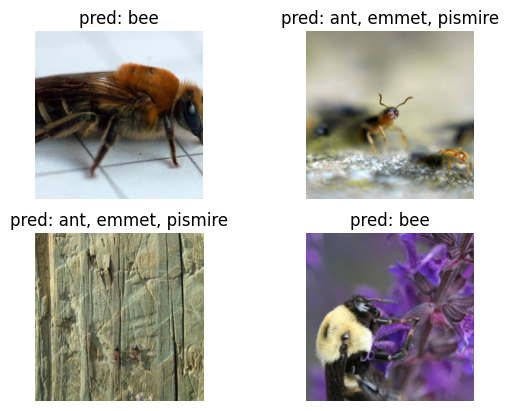

In [ ]:
visualize_predictions(model_vgg13)

# Exploring GoogLeNet

In [ ]:
class InceptionModule(nn.Module):
  def __init__(self, input_planes, n_channels1x1, n_channels3x3red,
               n_channels3x3, n_channels5x5red, n_channels5x5, pooling_planes):

    super(InceptionModule, self).__init__()

    self.block1 = nn.Sequential(
        nn.Conv2d(input_planes, n_channels1x1, kernel_size=1),
        nn.BatchNorm2d(n_channels1x1),
        nn.ReLU(True),
    )

    self.block2 = nn.Sequential(
        nn.Conv2d(input_planes, n_channels3x3red, kernel_size=1),
        nn.BatchNorm2d(n_channels3x3red),
        nn.ReLU(True),
        nn.Conv2d(n_channels3x3red, n_channels3x3, kernel_size=3, padding=1),
        nn.BatchNorm2d(n_channels3x3),
        nn.ReLU(True),
    )

    self.block3 = nn.Sequential(
        nn.Conv2d(input_planes, n_channels5x5red, kernel_size=1),
        nn.BatchNorm2d(n_channels5x5red),
        nn.ReLU(True),
        nn.Conv2d(n_channels5x5red, n_channels5x5, kernel_size=3, padding=1),
        nn.BatchNorm2d(n_channels5x5),
        nn.ReLU(True),
        nn.Conv2d(n_channels5x5, n_channels5x5, kernel_size=3, padding=1),
        nn.BatchNorm2d(n_channels5x5),
        nn.ReLU(True),
    )

    self.block4 = nn.Sequential(
        nn.MaxPool2d(3, padding=1, stride=1),
        nn.Conv2d(input_planes, pooling_planes, kernel_size=1),
        nn.BatchNorm2d(pooling_planes),
        nn.ReLU(True),
    )

  def forward(self, x):
    op1 = self.block1(x)
    op2 = self.block2(x)
    op3 = self.block3(x)
    op4 = self.block4(x)
    return torch.concat([op1,op2,op3,op4], 1)

In [ ]:
class GoogLeNet(nn.Module):
  def __init__(self):
    super(GooLeNet, self).__init__()
    self.stem = nn.Sequential(
        nn.Conv2d(3, 192, kernel_size=3, padding=1),
        nn.BatchNorm2d(192),
        nn.ReLU(True),
    )
    self.im1 = InceptionModule(192, 64, 96, 128, 16, 32, 32)
    self.im2 = InceptionModule(256, 128, 128, 192, 32, 96, 64)
    self.max_pool = nn.MaxPool2d(3, stride=2, padding=1)
    self.im3 = InceptionModule(480, 192, 96, 208, 16, 48, 64)
    self.im4 = InceptionModule(512, 160, 112, 224, 24, 64, 64)
    self.im5 = InceptionModule(512, 128, 128, 256, 24, 64, 64)
    self.im6 = InceptionModule(512, 112, 144, 288, 32, 64, 64)
    self.im7 = InceptionModule(528, 256, 160, 320, 32, 128, 128)
    self.im8 = InceptionModule(832, 256, 160, 320, 32, 128, 128)
    self.im9 = InceptionModule(832, 384, 192, 384, 48, 128, 128)
    self.average_pool = nn.AvgPool2d(7, stride=1)
    self.fc = nn.Linear(1024, 1000)

  def forward(self, x):
    x = self.stem(x)

    x = self.im1(x)
    x = self.im2(x)
    x = self.max_pool(x)

    x = self.im3(x)
    x = self.im4(x)
    x = self.im5(x)
    x = self.im6(x)
    x = self.im7(x)
    x = self.max_pool(x)

    x = self.im8(x)
    x = self.im9(x)

    x = self.average_pool(x)
    x = x.view(x.size(0), -1)
    x = self.fc(x)

    return x

# ResNet

In [ ]:
# residual block for ResNet

class BasicBlock(nn.Module):
  def __init__(self, input_num_planes, num_planes, stride=1):
    super(BasicBlock, self).__init__()
    self.conv_layer1 = nn.Conv2d(input_num_planes, num_planes, kernel_size=3, stride=stride, padding=1, bias=False)
    self.batch_norm1 = nn.BatchNorm2d(num_planes)
    self.conv_layer2 = nn.Conv2d(num_planes, num_planes, kernel_size=3, stride=1, padding=1, bias=False)
    self.batch_norm2 = nn.BatchNorm2d(num_planes)
    self.res_connection = nn.Sequential()
    if stride > 1 or input_num_planes != self.multiplier*num_planes:
      self.res_connection = nn.Sequential(
          nn.Conv2d(input_num_planes, self.multiplier*num_planes, kernel_size=3, padding=1, stride=stride, bias=False),
          nn.BatchNorm2d(self.multiplier*num_planes)
      )

  def forward(self, x):
    x = nn.ReLU(self.batch_norm1(self.conv_layer1(x)))
    x = self.batch_norm2(self.conv_layer2(x))
    x += self.res_connection(x)
    x = nn.ReLU(x)
    return x

# DenseNet

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
class DenseBlock(nn.Module):
  def __init__(self, input_num_planes, rate_inc):
    super(DenseBlock, self).__init__()
    self.batch_norm1 = nn.BatchNorm2d(input_num_planes)
    self.conv_layer1 = nn.Conv2d(input_num_planes, rate_inc*4, kernel_size=1, bias=False)
    self.batch_norm2 = nn.BatchNorm2d(rate_inc*4)
    self.conv_layer2 = nn.Conv2d(rate_inc*4, rate_inc, kernel_size=3, padding=1, bias=False)

  def forward(self, inp):
    op = self.conv_layer1(F.relu(self.batch_norm1(inp)))
    op = self.conv_layer2(F.relu(self.batch_norm2(op)))
    return torch.cat([op, inp], 1)

In [ ]:
class TransitionBlock(nn.Module):
  def __init__(self, input_num_planes, output_num_planes):
    super(TransitionBlock, self).__init__()
    self.batch_norm = nn.BatchNorm2d(input_num_planes, output_num_planes)
    self.conv_layer = nn.Conv2d(input_num_planes, output_num_planes, kernel_size=1, bias=False)

  def forward(self, x):
    x = self.conv_layer(F.relu(self.batch_norm(x)))
    x = F.avg_pool2d(x, 2)
    return x